## Reaction Bench Lesson 2

### Getting a high reward in a reaction of form: 
### A-X + A-X --> A-A + X-X and A-X + B-X --> A-B + X-X

In this lesson we will try to get a high reward in the reaction of the form above. Rewards will come from producing either A-A or B-B. It's important to note that the reward cannot come from A-B as this doesn't make the desired property. The reaction we will be simulating in this lesson is specifically:
- 2 3-chlorohexane + 2 Na --> 4,5-diethyloctane + 2 NaCl

In similar fashion to lesson 1, the reactions used in this lesson are found in the reaction file. The reaction above is 1 of the 6 total reactions in the Wurtz reaction.

The particular reaction we will be simulating is performed in an aqueous state with ethoxyethane as the solvent.

From lesson 1 we know that our action space is a 6 element vector represented by:

|              | Temperature | Volume | 1-chlorohexane | 2 chlorohexane | 3-chlorohexane | Na  | 
|--------------|-------------|--------|----------------|----------------|----------------|-----|
| Value range: | 0-1         | 0-1    | 0-1            | 0-1            | 0-1            |0-1|

First let's start by importing all the modules we need.

In [1]:
# import all the required external modules
import gym
import numpy as np
import os
import pickle
import sys
from time import sleep
from gym import envs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# ensure all necessary modules can be found
sys.path.append("../") # to access chemistrylab
sys.path.append("../chemistrylab/reactions") # to access all reactions

# import all local modules
import chemistrylab

This will show all the environments we can currently run. Eventually you can create your own environments with different reactions and target material using the reaction template.

In [2]:
# show all environments for reaction bench
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs if 'React' in env_spec.id]
print(env_ids)

['WurtzReact-v0', 'WurtzReact_overlap-v0']


This explains the simulated reaction we are trying to simulate and is initializing the reaction environment.

In [3]:
# trying to get high reward for wurtz reaction of form:
# A-X + A-X --> A-A + X-X and A-X + B-X --> A-B + X-X
# Rewards comes from producing A-A or B-B
# Cannot come from A-B as this doesn't make the desired property
# Desired material in this case is initialized to be 4,5-diethyloctane
# initializes environment
env = gym.make("WurtzReact-v0")
render_mode = "human"

In [4]:
done = False
__ = env.reset()

# shows # of actions available
print('# of actions available: ',env.action_space.shape[0])
num_actions_available = env.action_space.shape[0]

total_steps=0
total_reward=0

# of actions available:  6


We will store certain values in these arrays so can plot them later on to visually show how each variable changes over time.

In [5]:
reward_over_time=[]
steps_over_time=[]
reactant_1 = []
reactant_2 = []
total_reward_over_time = []

action = np.ones(env.action_space.shape)

The key to achieving a high reward in this simulation is to only add the reactants that are needed for the reaction to 
continue. This means that we will only add 3-chlorohexane and Na with our actions. This will allow us to maximize our 
reward as a large quantity of these reactants means the reaction with our target material will occur more often. We 
do this by running the following commands:

![code](../sample_figures/lesson_2r_image0.PNG)

Notice that we're only adding the reactants we need for the reaction to continue.

![reaction](../sample_figures/lesson_2r_image1.PNG)

Let's run our program and see what happens!

-----------------------------------------
total_steps:  0
reward: 0.28 
total reward: 0.28


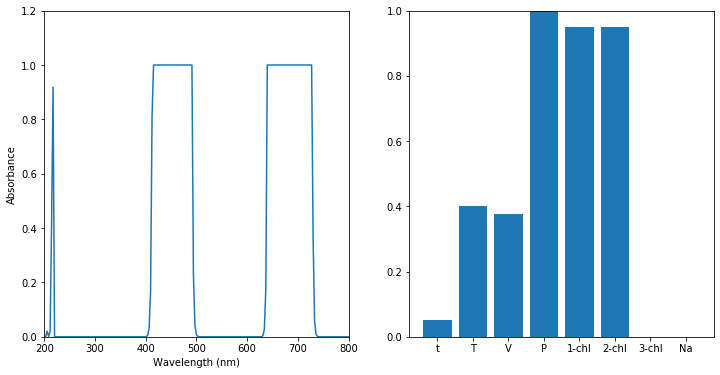

-----------------------------------------
total_steps:  1
reward: 0.28 
total reward: 0.57
-----------------------------------------
total_steps:  2
reward: 0.28 
total reward: 0.85
-----------------------------------------
total_steps:  3
reward: 0.28 
total reward: 1.13
-----------------------------------------
total_steps:  4
reward: 0.28 
total reward: 1.41
-----------------------------------------
total_steps:  5
reward: 0.28 
total reward: 1.69
-----------------------------------------
total_steps:  6
reward: 0.28 
total reward: 1.97
-----------------------------------------
total_steps:  7
reward: 0.28 
total reward: 2.25
-----------------------------------------
total_steps:  8
reward: 0.28 
total reward: 2.52
-----------------------------------------
total_steps:  9
reward: 0.28 
total reward: 2.80
-----------------------------------------
total_steps:  10
reward: 0.28 
total reward: 3.08
-----------------------------------------
total_steps:  11
reward: 0.28 
total reward: 3.

In [6]:
while not done:
    # Actions:
    #   a[0] changes the temperature between -dT (a[0] = 0.0) and +dT (a[0] = 1.0)
    #   a[1] changes the Volume between -dV (a[1] = 0.0) and +dV (a[1] = 1.0)
    #   a[2:] adds between none (a[2:] = 0.0) and all (a[2:] = 1.0) of each reactant
    if total_steps  < 20:
        action[0] = 1
        action[1] = 1
        action[2] = 0.05 # 1-chlorohexane
        action[3] = 0.05 # 2-chlorohexane
        action[4] = 1    # 3-chlorohexane
        action[5] = 1    # Na

        '''
        # Adding Reactants not needed:
        action[0] = 1
        action[1] = 1
        action[5] = 1
        action[4] = 1
        action[2] = 1
        action[3] = 1
        '''

    # perform the action and update the reward
    state, reward, done, __ = env.step(action)
    print('-----------------------------------------')
    print('total_steps: ', total_steps)
    print('reward: %.2f ' % reward)
    total_reward += reward
    print('total reward: %.2f' % total_reward)
    # print(state)

    # render the plot
    env.render(mode=render_mode)
    # sleep(2)

    # increment one step
    total_steps += 1

    # append arrays for states over time
    reward_over_time.append(reward)
    total_reward_over_time.append(total_reward)
    steps_over_time.append(total_steps)
    reactant_1.append(env.state[6])
    reactant_2.append(env.state[7])

Notice that we get a total reward of 5.33. A visual representation of the reactants being used and total reward increasing can be seen in the subplot we produce!

![subplot](../sample_figures/lesson_2r_image3.PNG)

This simply shows us the stats of the reaction vessel. It essentially shows everything from thermodynamic variables, to the amount of material

In [7]:
# ask user if they want to see stats of reaction vessel
show_stats = input("Show Reaction Vessel Stats ('Y'/'N') >>> ")

if show_stats.lower() in ["y", "yes"]:
    # open and check the material dict
    vessel_path = os.path.join(os.getcwd(), "vessel_experiment_0.pickle")
    with open(vessel_path, 'rb') as open_file:
        v = pickle.load(open_file)

    print("")
    print("---------- VESSEL ----------")
    print("Label: {}".format(v.label))

    print("")
    print("---------- THERMODYNAMIC VARIABLES ----------")
    print("Temperature (in K): {:e}".format(v.temperature))
    print("Volume (in L): {:e}".format(v.volume))
    print("Pressure (in kPa): {:e}".format(v.pressure))

    print("")
    print("---------- MATERIAL_DICT ----------")
    for material, value_list in v._material_dict.items():
        print("{} : {}".format(material, value_list))

    print("")
    print("---------- SOLUTE_DICT ----------")
    for solute, value_list in v._solute_dict.items():
        print("{} : {}".format(solute, value_list))

Show Reaction Vessel Stats ('Y'/'N') >>> y

---------- VESSEL ----------
Label: new

---------- THERMODYNAMIC VARIABLES ----------
Temperature (in K): 1.000000e+00
Volume (in L): 1.197500e-06
Pressure (in kPa): 8.192200e-07

---------- MATERIAL_DICT ----------
1-chlorohexane : [<class 'chemistrylab.chem_algorithms.material.OneChlorohexane'>, 0.2768946]
2-chlorohexane : [<class 'chemistrylab.chem_algorithms.material.TwoChlorohexane'>, 0.0]
3-chlorohexane : [<class 'chemistrylab.chem_algorithms.material.ThreeChlorohexane'>, 0.0]
Na : [<class 'chemistrylab.chem_algorithms.material.Na'>, 0.2768946]
dodecane : [<class 'chemistrylab.chem_algorithms.material.Dodecane'>, 0.36155286]
5-methylundecane : [<class 'chemistrylab.chem_algorithms.material.FiveMethylundecane'>, 0.0]
4-ethyldecane : [<class 'chemistrylab.chem_algorithms.material.FourEthyldecane'>, 0.0]
5,6-dimethyldecane : [<class 'chemistrylab.chem_algorithms.material.FiveSixDimethyldecane'>, 0.0]
4-ethyl-5-methylnonane : [<class 'chem

**Why 4,5-diethyloctane is not in the vessel stats????**

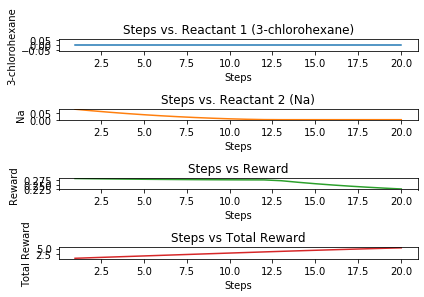

In [8]:

# graph states over time
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(steps_over_time, reactant_1)
ax1.set_title('Steps vs. Reactant 1 (3-chlorohexane)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('3-chlorohexane')

ax2.plot(steps_over_time, reactant_2, 'tab:orange')
ax2.set_title('Steps vs. Reactant 2 (Na)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Na')

ax3.plot(steps_over_time, reward_over_time, 'tab:green')
ax3.set_title('Steps vs Reward')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Reward')

ax4.plot(steps_over_time, total_reward_over_time, 'tab:red')
ax4.set_title('Steps vs Total Reward')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Total Reward')

fig.tight_layout()
plt.savefig('Final Subplots Demo Lesson 3.png')
plt.show()

For the second part of the experiment let's uncomment the code that adds the reactants not needed and run our code again.

![code](../sample_figures/lesson_2r_image4.PNG)

If we run this code we'll notice that our reward is significantly lower. It is now only 0.63 which is a drop-off from our previous set of actions. Once again, the reason this is happening is that other reactions are taking place instead of the reaction that produces our desired material. 

The next step for this reaction environment is to write an RL implementation that will allow the agent to solve this problem for you essentially maximizing our output of the desired material! 